# 6.5 Machine Learning Part 2

## This script contains the following:

### 1. Importing libraries and data and removing categorical columns
### 2. Standardizing the data
### 3. The elbow technique
### 4. k-Means clustering
### 5. Descriptive statistics and conclusions

### 1. Importing libraries and data and removing categorical columns

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
import scipy 
from scipy import stats 

In [2]:
# Display graphs in notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'billionaires_updated1.csv'), index_col = None)

In [5]:
# Removing the limit to columns displayed

pd.options.display.max_columns = None

In [6]:
df.shape

(2640, 27)

In [7]:
df.head()

,Unnamed: 0,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,industries_total,country_total,wealth_category,age_category
0,0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,46.227638,2.213749,266,35.0,>=50B,old
1,1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,United States,True,M,Texas,South,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,73,754.0,>=50B,middle-aged
2,2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0,>=50B,middle-aged
3,3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0,>=50B,old
4,4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,372,754.0,>=50B,very old


In [8]:
# Deleting the extra index column

df.drop(columns = 'Unnamed: 0', inplace = True)

In [9]:
df.head()

,rank,final_worth,name,age,country,city,industries,citizenship_country,self_made,gender,state,state_region,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,latitude_country,longitude_country,industries_total,country_total,wealth_category,age_category
0,1,211000,Bernard Arnault & family,74.0,France,Paris,Fashion & Retail,France,False,M,NaN,NaN,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,46.227638,2.213749,266,35.0,>=50B,old
1,2,180000,Elon Musk,51.0,United States,Austin,Automotive,United States,True,M,Texas,South,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,73,754.0,>=50B,middle-aged
2,3,114000,Jeff Bezos,59.0,United States,Medina,Technology,United States,True,M,Washington,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0,>=50B,middle-aged
3,4,107000,Larry Ellison,78.0,United States,Lanai,Technology,United States,True,M,Hawaii,West,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,314,754.0,>=50B,old
4,5,106000,Warren Buffett,92.0,United States,Omaha,Finance & Investments,United States,True,M,Nebraska,Midwest,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,37.090240,-95.712891,372,754.0,>=50B,very old


In [10]:
df.shape

(2640, 26)

In [11]:
# Exclude categorical fields
# Specify the columns to keep
columns_to_keep = ['final_worth', 'age', 'cpi_country', 'cpi_change_country', 'gdp_country', 'tertiary_ed_enroll', 'primary_ed_enroll',
                  'life_expectancy_country', 'total_tax_rate_country', 'population_country', 'industries_total',
                  'country_total']

# Subset the DataFrame to include only the specified columns
df2 = df[columns_to_keep]

In [12]:
print(type(df2))

<class 'pandas.core.frame.DataFrame'>


In [13]:
df2.head()

,final_worth,age,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,industries_total,country_total
0,211000,74.0,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,266,35.0
1,180000,51.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,73,754.0
2,114000,59.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,314,754.0
3,107000,78.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,314,754.0
4,106000,92.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,372,754.0


In [14]:
df2.shape

(2640, 12)

### 2. Standardizing the data

#### I tried using Using sci-kit learn Standard scaler, which eventually worked, but it put the data into an array and I couldn't figure out how to get it back into a data frame format. Then I tried Using scipy.stats() and it also seemed to work, but on most of the columns it returned a NaN value. So, now I'm going to try to find z-scores using Pandas.

In [15]:
# Finding z-scores to standardize the data

df2.loc[:, 'final_worth'] =( df2['final_worth'] - df2['final_worth'].mean() ) / df2['final_worth'].std()

In [16]:
df2.head()

,final_worth,age,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,industries_total,country_total
0,20.985474,74.0,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,266,35.0
1,17.833223,51.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,73,754.0
2,11.121978,59.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,314,754.0
3,10.410179,78.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,314,754.0
4,10.308494,92.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,372,754.0


In [17]:
# Using the same method for the age column and checking the result

df2.loc[:, 'age'] =( df2['age'] - df2['age'].mean() ) / df2['age'].std()

In [18]:
df2.head()

,final_worth,age,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,industries_total,country_total
0,20.985474,0.668256,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,266,35.0
1,17.833223,-1.066533,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,73,754.0
2,11.121978,-0.463128,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,314,754.0
3,10.410179,0.969959,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,314,754.0
4,10.308494,2.025917,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,372,754.0


In [19]:
# This method seems to be working, so I'll use it on the remaining columns.

df2.loc[:, 'cpi_country'] =( df2['cpi_country'] - df2['cpi_country'].mean() ) / df2['cpi_country'].std()
df2.loc[:, 'cpi_change_country'] =( df2['cpi_change_country'] - df2['cpi_change_country'].mean() ) / df2['cpi_change_country'].std()
df2.loc[:, 'gdp_country'] =( df2['gdp_country'] - df2['gdp_country'].mean() ) / df2['gdp_country'].std()
df2.loc[:, 'tertiary_ed_enroll'] =( df2['tertiary_ed_enroll'] - df2['tertiary_ed_enroll'].mean() ) / df2['tertiary_ed_enroll'].std()
df2.loc[:, 'primary_ed_enroll'] =( df2['primary_ed_enroll'] - df2['primary_ed_enroll'].mean() ) / df2['primary_ed_enroll'].std()
df2.loc[:, 'life_expectancy_country'] =( df2['life_expectancy_country'] - df2['life_expectancy_country'].mean() ) / df2['life_expectancy_country'].std()
df2.loc[:, 'total_tax_rate_country'] =( df2['total_tax_rate_country'] - df2['total_tax_rate_country'].mean() ) / df2['total_tax_rate_country'].std()
df2.loc[:, 'population_country'] =( df2['population_country'] - df2['population_country'].mean() ) / df2['population_country'].std()
df2.loc[:, 'industries_total'] =( df2['industries_total'] - df2['industries_total'].mean() ) / df2['industries_total'].std()
df2.loc[:, 'country_total'] =( df2['country_total'] - df2['country_total'].mean() ) / df2['country_total'].std()

In [20]:
df2.head()

,final_worth,age,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,industries_total,country_total
0,20.985474,0.668256,-0.669309,-0.900768,-0.926038,-0.076167,-0.076103,1.173475,1.378036,-0.799548,0.336314,-1.026671
1,17.833223,-1.066533,-0.397506,0.865352,1.028117,0.982707,-0.224692,0.101117,-0.606271,-0.328313,-1.499579,1.282848
2,11.121978,-0.463128,-0.397506,0.865352,1.028117,0.982707,-0.224692,0.101117,-0.606271,-0.328313,0.792909,1.282848
3,10.410179,0.969959,-0.397506,0.865352,1.028117,0.982707,-0.224692,0.101117,-0.606271,-0.328313,0.792909,1.282848
4,10.308494,2.025917,-0.397506,0.865352,1.028117,0.982707,-0.224692,0.101117,-0.606271,-0.328313,1.344628,1.282848


In [21]:
print(type(df2))


<class 'pandas.core.frame.DataFrame'>


#### This seems to have worked for standardizing the data frame. Now I will remove the NaN values because having those in there created problems moving forward with the elbow technique in the past.

In [22]:
# dropping NaN values from df2

df2 = df2.dropna()

In [23]:
df2.shape

(2407, 12)

#### 233 records were dropped to remove NaN values so that I can continue with k-means. This is 8.8% of the total data set. Hopefully, since this is less than 10%, it will not skew the results too much.

## 3. The elbow technique

In [26]:
# With the help of chatGPT, I altered the code below to include 'n_init=10' to avoide getting a 'FutureWarning'.

num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [27]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-28899.427447303828,
 -22574.863153607275,
 -17224.523008629345,
 -13195.056818797213,
 -11661.615239702836,
 -10913.940360263497,
 -9940.230435712441,
 -9066.865135047212,
 -8262.811322216956]

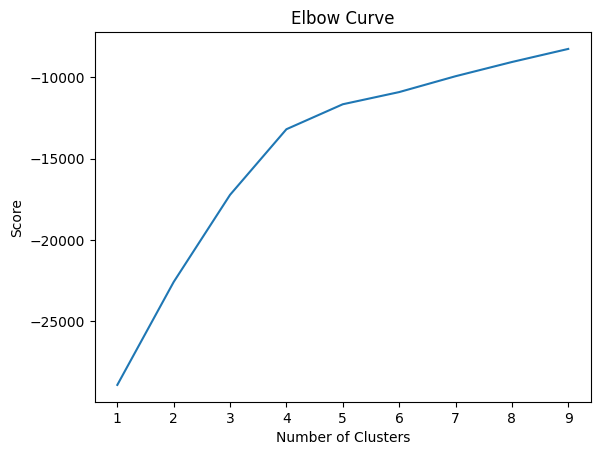

In [28]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The curve does not rise as dramatically after 4 clusters, so that will be the optimal number of clusters to use.

## 4. K-means clustering

In [31]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_init=10) 

In [32]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=4, n_init=10)

#### Now I will add a 'clusters' column to assign each record to a cluster

In [34]:
df2['clusters'] = kmeans.fit_predict(df2)

In [35]:
df2.head()

,final_worth,age,cpi_country,cpi_change_country,gdp_country,tertiary_ed_enroll,primary_ed_enroll,life_expectancy_country,total_tax_rate_country,population_country,industries_total,country_total,clusters
0,20.985474,0.668256,-0.669309,-0.900768,-0.926038,-0.076167,-0.076103,1.173475,1.378036,-0.799548,0.336314,-1.026671,1
1,17.833223,-1.066533,-0.397506,0.865352,1.028117,0.982707,-0.224692,0.101117,-0.606271,-0.328313,-1.499579,1.282848,2
2,11.121978,-0.463128,-0.397506,0.865352,1.028117,0.982707,-0.224692,0.101117,-0.606271,-0.328313,0.792909,1.282848,2
3,10.410179,0.969959,-0.397506,0.865352,1.028117,0.982707,-0.224692,0.101117,-0.606271,-0.328313,0.792909,1.282848,2
4,10.308494,2.025917,-0.397506,0.865352,1.028117,0.982707,-0.224692,0.101117,-0.606271,-0.328313,1.344628,1.282848,2


In [36]:
df2['clusters'].value_counts()

clusters
2    754
1    753
0    504
3    396
Name: count, dtype: int64

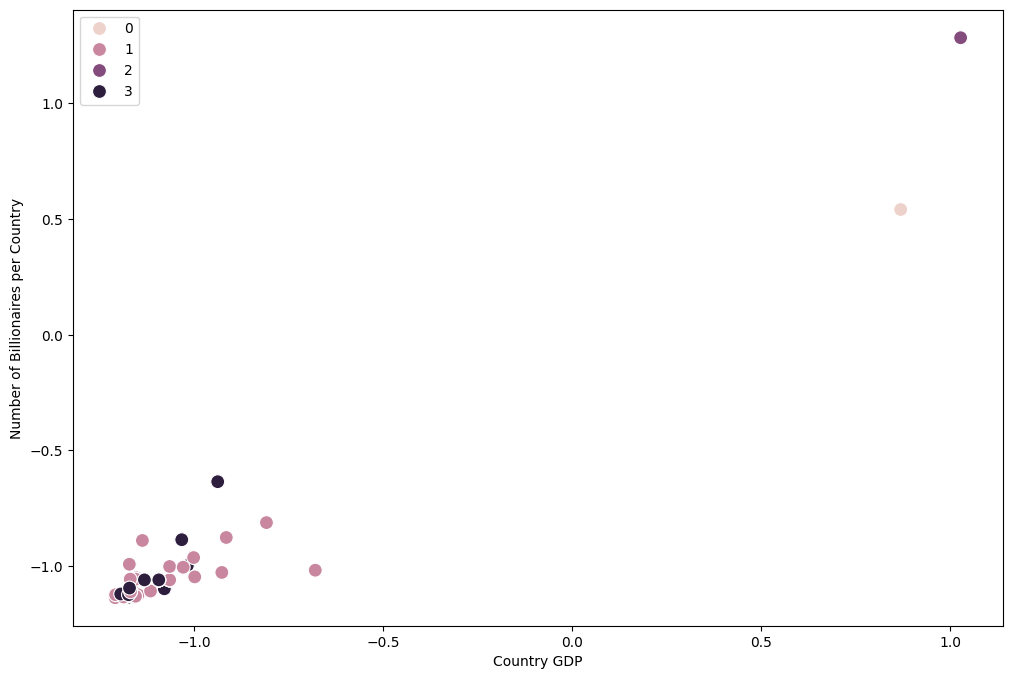

In [37]:
# Plot the clusters for the "gdp_country" and "country_total" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['gdp_country'], y=df2['country_total'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Country GDP') # Label x-axis.
plt.ylabel('Number of Billionaires per Country') # Label y-axis.
plt.show()

#### The two big outliers make the chart scale too small to see details in the remaining data points. They are all clumped on top of each other and so the visualization isn't useful for seeing any patterns.

In [43]:
# What happens if we remove the two big outliers?

# Filter the data frame to exclude 'gdp_country' z-scores over 0
filtered_df = df2[df2['gdp_country'] <= 0]

In [44]:
# Fit the k-means object to the data.

kmeans.fit(filtered_df)

KMeans(n_clusters=4, n_init=10)

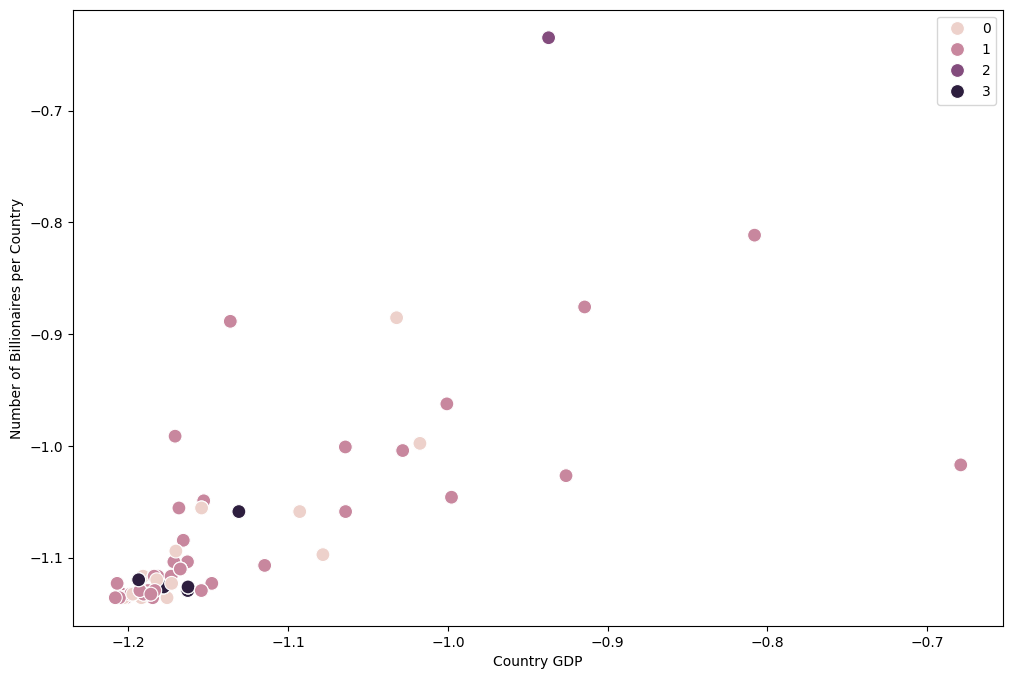

In [45]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=filtered_df['gdp_country'], y=filtered_df['country_total'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Country GDP') # Label x-axis.
plt.ylabel('Number of Billionaires per Country') # Label y-axis.
plt.show()

#### The dots are still so densely clustered in the bottom corner, that it is still not a very useful visualization. I can see that the dark purple points, which are the smallest cluster, only have data points at least one point below the standard deviation for both variables. But when those standard deviations were calculated, they took into account the two extreme outliers that skewed all other data points to be under the standard deviation. Regardless, I don't get much useful information from this chart.

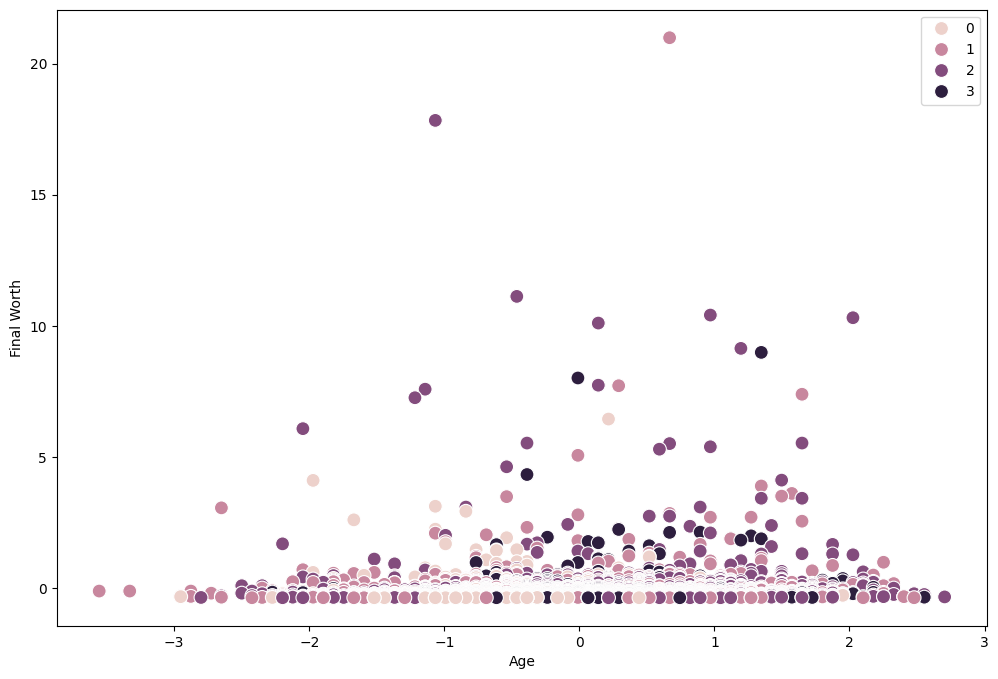

In [38]:
# Plot the clusters for the "final_worth" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['age'], y=df2['final_worth'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Final Worth') # Label y-axis.
plt.show()

#### I don't see any pattern to the clusters in this chart other than that the pink has the lowest age. Light pink spans the age range with perhaps an exception to the highest deviations in age. However, it is hard to tell because there are so many overlapping data points, I can't really know for sure how high the ages go for that cluster.

In [46]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=4, n_init=10)

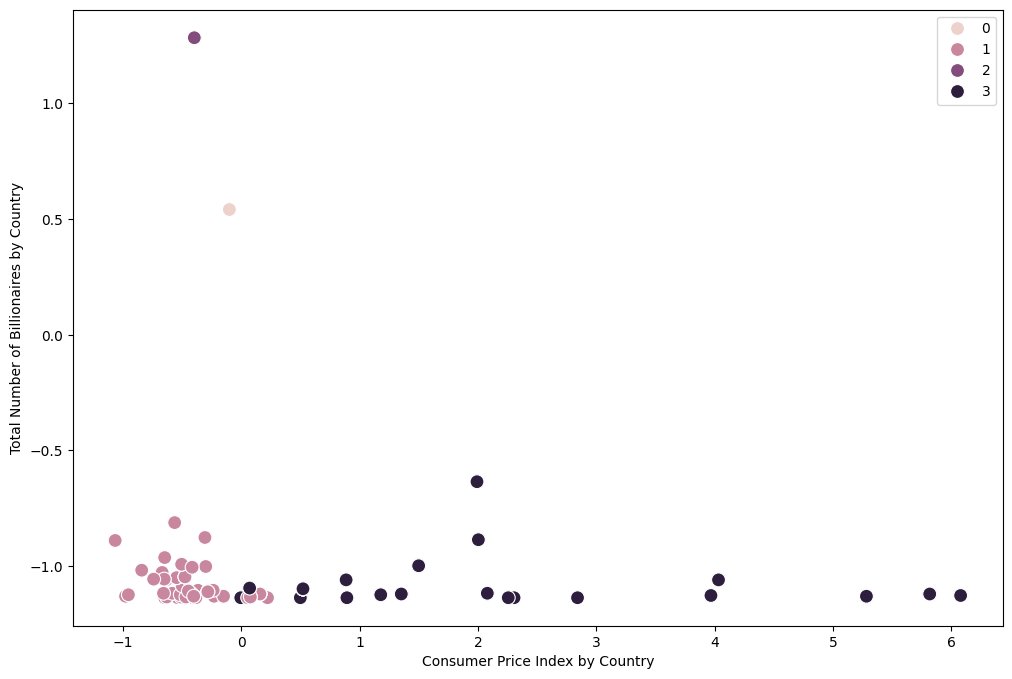

In [47]:
# # Plot the clusters for the "cpi_country" and "country_total" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['cpi_country'], y=df2['country_total'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Consumer Price Index by Country') # Label x-axis.
plt.ylabel('Total Number of Billionaires by Country') # Label y-axis.
plt.show()

#### It would appear that most billionaires live in countries with a lower consumper price index (a measurement of inflation).

## 5. Descriptive statistics and conclusions

In [48]:
# Descriptive statistics

df2.loc[df2['clusters'] == 3, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 2, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'pink'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'light pink'

In [49]:
df2.groupby('cluster').agg({'gdp_country':['mean', 'median'], 
                         'country_total':['mean', 'median'], 
                         'age':['mean', 'median'],
                          'final_worth':['mean', 'median'],
                           'cpi_country':['mean', 'median']})

gdp_country           country_total                 age            \
                   mean    median          mean    median      mean    median   
cluster                                                                         
dark purple   -1.024525 -1.017495     -0.858553 -0.885337  0.097802  0.140277   
light pink     0.869620  0.869620      0.540847  0.540847 -0.486025 -0.538553   
pink          -1.025296 -1.064035     -0.980664 -1.000974  0.054434  0.140277   
purple         1.028117  1.028117      1.282848  1.282848  0.163385  0.140277   

            final_worth           cpi_country            
                   mean    median        mean    median  
cluster                                                  
dark purple   -0.055701 -0.246464    1.996072  1.991642  
light pink    -0.112982 -0.276970   -0.101131 -0.101131  
pink          -0.002108 -0.226127   -0.566373 -0.563461  
purple         0.146832 -0.175284   -0.397506 -0.397506

#### The purple cluster seems to have the best stats in most categories with the exception of 'cpi_country', in which the pink cluster has a lower z-score for inflation.
#### Regarding the ages of billionaires, the light pink cluster has the overall youngest billionaires and the purple cluster has the oldest. If age is a factor, it seems to be better to be older than younger. The purple cluster, with the oldest billionaires, also has the best stats in most other areas (except CPI). While the light pink cluster, with the youngest billionaires, has the lowest final worth and the 3rd highest CPI.
#### While the pink cluster has the lowest z-score for inflation, it also has the lowest overall GDP per country and the lowest number of billionaires per country.
#### A country's GDP and it's total number of billionaires are ranked hand in hand. Pink has the lowest of both, dark purple next, then pink third, and purple has the highest of both.

### Results could be useful for in future steps of an analytics pipeline:
#### 1. Age may be a factor in building wealth. The older the billionaire, the higher the final worth and the more of them there are.
#### 2. There seems to be a close relationship between a country's GDP and its number of billionaires.
#### 3. It seems most billionaires live in countries with low CPI.